In [12]:
import tensorflow as tf  
import numpy as np  
import gensim
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from operator import itemgetter
import keras
from sklearn.model_selection import train_test_split
import json
import os
from collections import Counter
from keras.callbacks import EarlyStopping 


PATH = '../new_Steeve_data/filter_CareerBuilder/can/'
NUM_PL = 4
D_WORD = 100
pl_cnt = json.load(open('../Steeve_data/tfidf_score_all.json','r'))
model = gensim.models.Word2Vec.load("fs_W2V_model_des_ski")
batch_size = 100
epochs = 1000
NUM_CLASS = 6

In [13]:
### 額外程式，主要去打亂合併的資料，並做k-fold 的取資料
class CrossValidationFolds(object):
    
    def __init__(self, data, labels, num_folds, shuffle=True):
        self.data = data
        self.labels = labels
        self.num_folds = num_folds
        self.current_fold = 0
        
        # Shuffle Dataset
        if shuffle:
            perm = np.random.permutation(self.data.shape[0]) ##隨機打亂資料
            data = data[perm]
            labels = labels[perm]
    
    def split(self):
        current = self.current_fold
        size = int(self.data.shape[0]/self.num_folds) # 30596 / 5 一塊k的size大小
        
        index = np.arange(self.data.shape[0]) 

        # 利用 True/False 抓出 validation 區塊
        lower_bound = index >= current*size # validation 下界
        upper_bound = index < (current + 1)*size # 上界

        cv_region = lower_bound*upper_bound

        cv_data = self.data[cv_region] # 利用 True/False 抓出 True 的資料
        train_data = self.data[~cv_region]
        
        cv_labels = self.labels[cv_region]
        train_labels = self.labels[~cv_region]
        
        self.current_fold += 1 ## 丟回下一的fold
        return (train_data, train_labels), (cv_data, cv_labels)

In [14]:
pwd

'/home/nlplab/fun/Atos_Steeve/Steeve_ml_model'

In [15]:
def load_4pl_data(path):
    t = 0
    s = 0
    train_data = []
    train_y = []
    # load json files and get title name of each json file
    file_data=[]
    feild_names=[]
    key = []
    
    # label
    label = []
#     label.append([1,0,0,0])
#     label.append([0,1,0,0])
#     label.append([0,0,1,0])
#     label.append([0,0,0,1])
    label.append(0)
    label.append(1)
    label.append(2)
    label.append(3)
    l = 0
    
    for path, dirs, files in os.walk(path):
        for file in files:
            job = json.load(open(path+file))
            for k in job.keys():
                print(k)
                for num, j in enumerate(job[k]):
#                     tf_value = Counter()
                    m = []
                    
                    aaa = Counter()
            
                    # compare four fields tf-idf value
                    N_SCORE = .0
                    MAX_SCORE = .0
                    PREDICT_FIELD = '' 
                    
                    for f in pl_cnt:
                        for pl in j["PL"]:
                            if (pl_cnt[f].get(pl))==None:
                                continue
                            N_SCORE += pl_cnt[f].get(pl)
                        if N_SCORE > MAX_SCORE:
                            PREDICT_FIELD = f
                            MAX_SCORE = N_SCORE
                        elif PREDICT_FIELD == '':
                            PREDICT_FIELD = f
                        
      
                    for pl in j["PL"]:
                        if (pl_cnt[PREDICT_FIELD].get(pl))==None:
                            pass
                        else:
                            aaa[pl]=((pl_cnt[k].get(pl)))
                    
#                     can = Counter(j["PL_value"]).most_common(4)
                    for i, g in sorted(dict(aaa).items(), key=itemgetter(1), reverse=True)[:NUM_PL]:
#                     for i,g in can:
                        try:
                            x = list(model[i])
                            m = m + x
                            t += 1
                        except:
                            s += 1
                        
                    if len(m) < D_WORD*NUM_PL:
                        if (len(m)/D_WORD)%2 == 0:
                            m = m+m[0:D_WORD] 
                        if len(m) == D_WORD*6:
                            m = m + m[0:D_WORD*2]
                        elif len(m) == D_WORD*4:
                            m = m + m
                        elif len(m) == D_WORD*2:
                            m = m + m[0:D_WORD]
                            m = m + m
                        if len(m) != D_WORD*NUM_PL:
                            continue
                            
                    train_data.append(m)
                    train_y.append(l)
            l += 1
#                             print(i)
    print(t,s)
            
    return train_data,train_y

In [20]:
FOLDS = 5

x, y = load_4pl_data(PATH)
x2, y2 = load_4pl_data('../new_Steeve_data/no_filter_Dice/can/')
x += x2
y += y2
x = np.array(x)
y = np.array(y)


# x = x.reshape(-1,10,10,4).astype("float32")
x = x.reshape(-1,20,20,1).astype("float32")

###### test 同 training data #######
X_train, X_test1, Y_train, y_test1 = train_test_split(x, y, test_size = 0.2)
data = CrossValidationFolds(X_train, Y_train, FOLDS)
(X_train1, y_train1), (X_valid1, y_valid1) = data.split()

###### test 不同 training data #######
# X_train1, X_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size = 0.2)

# X_test1,y_test1 = load_4pl_data('../new_Steeve_data/no_filter_Dice/can/')
# X_test1 = np.array(X_test1)
# X_test1 = X_test1.reshape(len(X_test1),20,20,1).astype("float32")
# y_test1 = np.array(y_test1)
# print(y_train1.shape)

android
sa
security
pm
frontend
backend
5949 17
android
sa

/home/nlplab/fun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



security
pm
frontend
backend
75433 167


In [21]:

print(y_test1.shape,y_valid1.shape,y_train1.shape)
# onehot encoding
y_test1 = np_utils.to_categorical(y_test1)
y_train1 = np_utils.to_categorical(y_train1)
y_valid1 = np_utils.to_categorical(y_valid1)

print(X_train1.shape,X_test1.shape,X_valid1.shape)
print(y_test1.shape,y_valid1.shape,y_train1.shape)

(3598,) (2878,) (11514,)
(11514, 20, 20, 1) (3598, 20, 20, 1) (2878, 20, 20, 1)
(3598, 6) (2878, 6) (11514, 6)


In [22]:
model = Sequential()

# model 1
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(20,20,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASS, activation='softmax'))


# model 2
# model.add(Conv2D(16, (5, 5) ,input_shape=(20,20,1)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (5, 5)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (5, 5)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(4))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))


In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.002),
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=0, 
    verbose=0, 
    mode='auto')

In [24]:
history = model.fit(X_train1, y_train1,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid1, y_valid1)
         )
#           callbacks=[early_stopping])

Train on 11514 samples, validate on 2878 samples
Epoch 1/1000
11514/11514 [==============================] - 1s 51us/step - loss: 1.4981 - acc: 0.4706 - val_loss: 1.2991 - val_acc: 0.5983
Epoch 2/1000
11514/11514 [==============================] - 0s 40us/step - loss: 1.1614 - acc: 0.6505 - val_loss: 1.0689 - val_acc: 0.6758
Epoch 3/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.9745 - acc: 0.7509 - val_loss: 0.9229 - val_acc: 0.7658
Epoch 4/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.8485 - acc: 0.7866 - val_loss: 0.8175 - val_acc: 0.7808
Epoch 5/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.7554 - acc: 0.7981 - val_loss: 0.7335 - val_acc: 0.8065
Epoch 6/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.6826 - acc: 0.8126 - val_loss: 0.6683 - val_acc: 0.8061
Epoch 7/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.6249 - acc: 0.8167 - val_loss: 0.6

11514/11514 [==============================] - 0s 41us/step - loss: 0.1690 - acc: 0.9495 - val_loss: 0.1916 - val_acc: 0.9402
Epoch 60/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.1673 - acc: 0.9497 - val_loss: 0.1866 - val_acc: 0.9423
Epoch 61/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.1658 - acc: 0.9499 - val_loss: 0.1852 - val_acc: 0.9427
Epoch 62/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.1641 - acc: 0.9514 - val_loss: 0.1844 - val_acc: 0.9420
Epoch 63/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.1629 - acc: 0.9513 - val_loss: 0.1839 - val_acc: 0.9427
Epoch 64/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.1619 - acc: 0.9508 - val_loss: 0.1847 - val_acc: 0.9409
Epoch 65/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.1605 - acc: 0.9516 - val_loss: 0.1880 - val_acc: 0.9371
Epoch 66/1000
11514/11514 [=======

11514/11514 [==============================] - 0s 41us/step - loss: 0.1178 - acc: 0.9622 - val_loss: 0.1455 - val_acc: 0.9534
Epoch 118/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.1169 - acc: 0.9627 - val_loss: 0.1472 - val_acc: 0.9524
Epoch 119/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.1163 - acc: 0.9631 - val_loss: 0.1455 - val_acc: 0.9531
Epoch 120/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.1159 - acc: 0.9634 - val_loss: 0.1465 - val_acc: 0.9548
Epoch 121/1000
11514/11514 [==============================] - 0s 42us/step - loss: 0.1153 - acc: 0.9632 - val_loss: 0.1475 - val_acc: 0.9524
Epoch 122/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.1147 - acc: 0.9634 - val_loss: 0.1467 - val_acc: 0.9541
Epoch 123/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.1146 - acc: 0.9631 - val_loss: 0.1454 - val_acc: 0.9573
Epoch 124/1000
11514/11514 [

11514/11514 [==============================] - 0s 39us/step - loss: 0.0911 - acc: 0.9709 - val_loss: 0.1361 - val_acc: 0.9587
Epoch 176/1000
11514/11514 [==============================] - 2s 157us/step - loss: 0.0900 - acc: 0.9716 - val_loss: 0.1313 - val_acc: 0.9590
Epoch 177/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0902 - acc: 0.9717 - val_loss: 0.1299 - val_acc: 0.9580
Epoch 178/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0897 - acc: 0.9714 - val_loss: 0.1291 - val_acc: 0.9583
Epoch 179/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0895 - acc: 0.9711 - val_loss: 0.1284 - val_acc: 0.9597
Epoch 180/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0881 - acc: 0.9726 - val_loss: 0.1293 - val_acc: 0.9580
Epoch 181/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0890 - acc: 0.9720 - val_loss: 0.1295 - val_acc: 0.9583
Epoch 182/1000
11514/11514 

11514/11514 [==============================] - 0s 41us/step - loss: 0.0730 - acc: 0.9772 - val_loss: 0.1320 - val_acc: 0.9545
Epoch 234/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0723 - acc: 0.9767 - val_loss: 0.1281 - val_acc: 0.9573
Epoch 235/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0721 - acc: 0.9765 - val_loss: 0.1210 - val_acc: 0.9607
Epoch 236/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0715 - acc: 0.9772 - val_loss: 0.1262 - val_acc: 0.9607
Epoch 237/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0710 - acc: 0.9774 - val_loss: 0.1325 - val_acc: 0.9569
Epoch 238/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0713 - acc: 0.9766 - val_loss: 0.1432 - val_acc: 0.9521
Epoch 239/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0708 - acc: 0.9772 - val_loss: 0.1238 - val_acc: 0.9607
Epoch 240/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0584 - acc: 0.9803 - val_loss: 0.1195 - val_acc: 0.9628
Epoch 292/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0583 - acc: 0.9811 - val_loss: 0.1218 - val_acc: 0.9625
Epoch 293/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0583 - acc: 0.9807 - val_loss: 0.1325 - val_acc: 0.9590
Epoch 294/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0590 - acc: 0.9803 - val_loss: 0.1198 - val_acc: 0.9618
Epoch 295/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0581 - acc: 0.9805 - val_loss: 0.1215 - val_acc: 0.9632
Epoch 296/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0577 - acc: 0.9812 - val_loss: 0.1327 - val_acc: 0.9635
Epoch 297/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0574 - acc: 0.9812 - val_loss: 0.1277 - val_acc: 0.9593
Epoch 298/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0487 - acc: 0.9838 - val_loss: 0.1214 - val_acc: 0.9621
Epoch 350/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0479 - acc: 0.9853 - val_loss: 0.1180 - val_acc: 0.9632
Epoch 351/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.1778 - val_acc: 0.9448
Epoch 352/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0479 - acc: 0.9846 - val_loss: 0.1183 - val_acc: 0.9632
Epoch 353/1000
11514/11514 [==============================] - 0s 38us/step - loss: 0.0478 - acc: 0.9851 - val_loss: 0.1283 - val_acc: 0.9639
Epoch 354/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0470 - acc: 0.9861 - val_loss: 0.1195 - val_acc: 0.9635
Epoch 355/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0468 - acc: 0.9848 - val_loss: 0.1184 - val_acc: 0.9618
Epoch 356/1000
11514/11514 [

11514/11514 [==============================] - 0s 41us/step - loss: 0.0403 - acc: 0.9878 - val_loss: 0.1226 - val_acc: 0.9646
Epoch 408/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0396 - acc: 0.9878 - val_loss: 0.1202 - val_acc: 0.9663
Epoch 409/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0402 - acc: 0.9881 - val_loss: 0.1215 - val_acc: 0.9635
Epoch 410/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.1197 - val_acc: 0.9653
Epoch 411/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0394 - acc: 0.9876 - val_loss: 0.1217 - val_acc: 0.9653
Epoch 412/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.1491 - val_acc: 0.9559
Epoch 413/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0396 - acc: 0.9878 - val_loss: 0.1212 - val_acc: 0.9621
Epoch 414/1000
11514/11514 [

11514/11514 [==============================] - 0s 39us/step - loss: 0.0338 - acc: 0.9894 - val_loss: 0.1219 - val_acc: 0.9656
Epoch 466/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0340 - acc: 0.9902 - val_loss: 0.1197 - val_acc: 0.9642
Epoch 467/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0330 - acc: 0.9900 - val_loss: 0.1266 - val_acc: 0.9656
Epoch 468/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0342 - acc: 0.9901 - val_loss: 0.1265 - val_acc: 0.9635
Epoch 469/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0334 - acc: 0.9896 - val_loss: 0.1270 - val_acc: 0.9659
Epoch 470/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0332 - acc: 0.9906 - val_loss: 0.1473 - val_acc: 0.9562
Epoch 471/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0337 - acc: 0.9902 - val_loss: 0.1237 - val_acc: 0.9670
Epoch 472/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0290 - acc: 0.9918 - val_loss: 0.1278 - val_acc: 0.9659
Epoch 524/1000
11514/11514 [==============================] - 2s 157us/step - loss: 0.0291 - acc: 0.9919 - val_loss: 0.1258 - val_acc: 0.9642
Epoch 525/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0294 - acc: 0.9917 - val_loss: 0.1314 - val_acc: 0.9642
Epoch 526/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0290 - acc: 0.9919 - val_loss: 0.1256 - val_acc: 0.9646
Epoch 527/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0290 - acc: 0.9913 - val_loss: 0.1260 - val_acc: 0.9653
Epoch 528/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0289 - acc: 0.9915 - val_loss: 0.1245 - val_acc: 0.9670
Epoch 529/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0286 - acc: 0.9914 - val_loss: 0.1279 - val_acc: 0.9666
Epoch 530/1000
11514/11514 

11514/11514 [==============================] - 0s 40us/step - loss: 0.0255 - acc: 0.9931 - val_loss: 0.1317 - val_acc: 0.9663
Epoch 582/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0259 - acc: 0.9926 - val_loss: 0.1280 - val_acc: 0.9649
Epoch 583/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0252 - acc: 0.9934 - val_loss: 0.1318 - val_acc: 0.9646
Epoch 584/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0250 - acc: 0.9928 - val_loss: 0.1752 - val_acc: 0.9461
Epoch 585/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0250 - acc: 0.9927 - val_loss: 0.1297 - val_acc: 0.9649
Epoch 586/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0255 - acc: 0.9926 - val_loss: 0.1275 - val_acc: 0.9673
Epoch 587/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0254 - acc: 0.9924 - val_loss: 0.1351 - val_acc: 0.9635
Epoch 588/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0230 - acc: 0.9932 - val_loss: 0.1321 - val_acc: 0.9656
Epoch 640/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0234 - acc: 0.9937 - val_loss: 0.1366 - val_acc: 0.9659
Epoch 641/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0225 - acc: 0.9937 - val_loss: 0.1503 - val_acc: 0.9632
Epoch 642/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0227 - acc: 0.9931 - val_loss: 0.1424 - val_acc: 0.9642
Epoch 643/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0228 - acc: 0.9942 - val_loss: 0.1319 - val_acc: 0.9666
Epoch 644/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0223 - acc: 0.9944 - val_loss: 0.1325 - val_acc: 0.9646
Epoch 645/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0226 - acc: 0.9937 - val_loss: 0.1310 - val_acc: 0.9646
Epoch 646/1000
11514/11514 [

11514/11514 [==============================] - 0s 41us/step - loss: 0.0205 - acc: 0.9942 - val_loss: 0.1345 - val_acc: 0.9666
Epoch 698/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0206 - acc: 0.9944 - val_loss: 0.1353 - val_acc: 0.9656
Epoch 699/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0210 - acc: 0.9942 - val_loss: 0.1441 - val_acc: 0.9646
Epoch 700/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0203 - acc: 0.9944 - val_loss: 0.1347 - val_acc: 0.9656
Epoch 701/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0208 - acc: 0.9937 - val_loss: 0.1952 - val_acc: 0.9534
Epoch 702/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0211 - acc: 0.9943 - val_loss: 0.1400 - val_acc: 0.9659
Epoch 703/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0210 - acc: 0.9937 - val_loss: 0.1363 - val_acc: 0.9656
Epoch 704/1000
11514/11514 [

11514/11514 [==============================] - 1s 54us/step - loss: 0.0186 - acc: 0.9946 - val_loss: 0.1495 - val_acc: 0.9649
Epoch 756/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0189 - acc: 0.9945 - val_loss: 0.1376 - val_acc: 0.9670
Epoch 757/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0193 - acc: 0.9944 - val_loss: 0.1383 - val_acc: 0.9666
Epoch 758/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0189 - acc: 0.9945 - val_loss: 0.1419 - val_acc: 0.9673
Epoch 759/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0186 - acc: 0.9949 - val_loss: 0.1420 - val_acc: 0.9649
Epoch 760/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0193 - acc: 0.9942 - val_loss: 0.1408 - val_acc: 0.9653
Epoch 761/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0197 - acc: 0.9947 - val_loss: 0.1540 - val_acc: 0.9663
Epoch 762/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0176 - acc: 0.9950 - val_loss: 0.1386 - val_acc: 0.9649
Epoch 814/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0178 - acc: 0.9948 - val_loss: 0.1484 - val_acc: 0.9663
Epoch 815/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0179 - acc: 0.9954 - val_loss: 0.3491 - val_acc: 0.9277
Epoch 816/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0203 - acc: 0.9942 - val_loss: 0.1404 - val_acc: 0.9659
Epoch 817/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0177 - acc: 0.9947 - val_loss: 0.1421 - val_acc: 0.9663
Epoch 818/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0179 - acc: 0.9950 - val_loss: 0.1464 - val_acc: 0.9659
Epoch 819/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0180 - acc: 0.9947 - val_loss: 0.2209 - val_acc: 0.9437
Epoch 820/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.1444 - val_acc: 0.9670
Epoch 872/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 0.1423 - val_acc: 0.9663
Epoch 873/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0164 - acc: 0.9953 - val_loss: 0.1585 - val_acc: 0.9611
Epoch 874/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0166 - acc: 0.9950 - val_loss: 0.1431 - val_acc: 0.9653
Epoch 875/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.1515 - val_acc: 0.9673
Epoch 876/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0168 - acc: 0.9949 - val_loss: 0.1429 - val_acc: 0.9656
Epoch 877/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0157 - acc: 0.9958 - val_loss: 0.1565 - val_acc: 0.9649
Epoch 878/1000
11514/11514 [

11514/11514 [==============================] - 0s 40us/step - loss: 0.0158 - acc: 0.9963 - val_loss: 0.1508 - val_acc: 0.9646
Epoch 930/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.1463 - val_acc: 0.9666
Epoch 931/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0156 - acc: 0.9953 - val_loss: 0.1498 - val_acc: 0.9680
Epoch 932/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0160 - acc: 0.9951 - val_loss: 0.1454 - val_acc: 0.9670
Epoch 933/1000
11514/11514 [==============================] - 0s 42us/step - loss: 0.0157 - acc: 0.9950 - val_loss: 0.1613 - val_acc: 0.9646
Epoch 934/1000
11514/11514 [==============================] - 0s 41us/step - loss: 0.0163 - acc: 0.9950 - val_loss: 0.1456 - val_acc: 0.9656
Epoch 935/1000
11514/11514 [==============================] - 0s 38us/step - loss: 0.0155 - acc: 0.9957 - val_loss: 0.1509 - val_acc: 0.9687
Epoch 936/1000
11514/11514 [

11514/11514 [==============================] - 0s 39us/step - loss: 0.0153 - acc: 0.9957 - val_loss: 0.1488 - val_acc: 0.9649
Epoch 988/1000
11514/11514 [==============================] - 0s 39us/step - loss: 0.0149 - acc: 0.9954 - val_loss: 0.1525 - val_acc: 0.9663
Epoch 989/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0150 - acc: 0.9947 - val_loss: 0.1493 - val_acc: 0.9670
Epoch 990/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.1524 - val_acc: 0.9670
Epoch 991/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.1499 - val_acc: 0.9677
Epoch 992/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0151 - acc: 0.9952 - val_loss: 0.1520 - val_acc: 0.9659
Epoch 993/1000
11514/11514 [==============================] - 0s 40us/step - loss: 0.0154 - acc: 0.9956 - val_loss: 0.1868 - val_acc: 0.9569
Epoch 994/1000
11514/11514 [

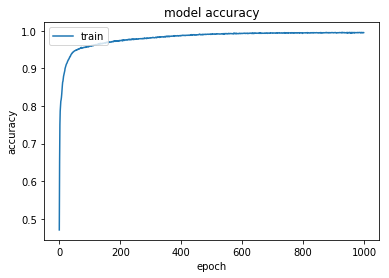

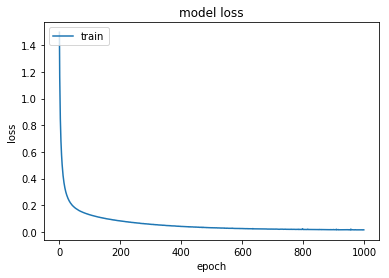

In [25]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [26]:
score = model.evaluate(X_test1, y_test1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.209762729172
Test accuracy: 0.958588104503
